# Assignment 6

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import derivative
import matplotlib.style
plt.xkcd()

## 1. The rounding error (re) and truncation error(te) for different methods of numerical differentiation are given by:
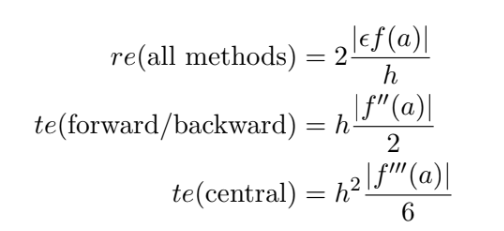
## Create a function which performs numerical differentiation when provided with the values of h, a, and method (forward, backward, or central), and returns the derivative value, truncation and rounding errors. Take $\epsilon$ = 10−10. Use it to do the following computations:

In [2]:
def numerical_derivative(f, a, h, method):
    epsilon = 1e-10
    if method == 'central':
        dv = (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        dv = (f(a + h) - f(a))/h
    elif method == 'backward':
        dv = (f(a) - f(a - h))/h
    else:
        raise Exception("Unknown method")
    re = 2 * epsilon * abs(f(a))/h
    if method == 'forward' or method == 'backward':
        te = h*abs(derivative(f, a, dx=h, n=2))/2
    elif method == 'central':
        te = h*h*abs(derivative(f, a, dx = h, n = 3, order = 5))/6
    return dv, re, te

### (a) Differentiate tanh(x), cos(x), log(x)
### i. Compare the values using different methods while taking a = 0.3 and h = 0.01. To compare, plot the derivative values on y-axis (you can plot simply 1,2,3 on the x-axis) along with te as error bar. Use errorbar function from pylab for this. The x-axis ticks should be labelled corresponding to the method used for that point. Use xticks option of pylab for this. Put the title of the plot as the function you have differentiated.

In [3]:
functions_list = [np.tanh, np.cos, np.log]

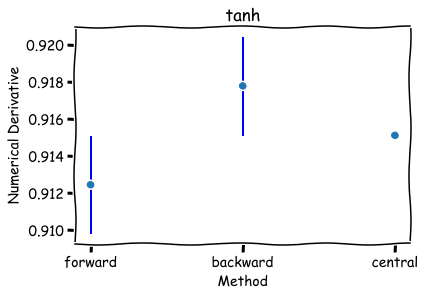

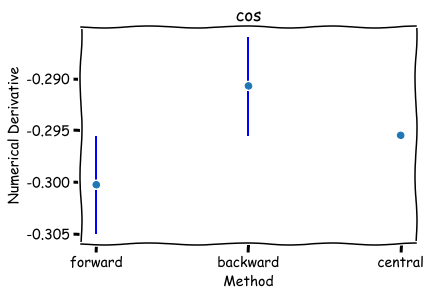

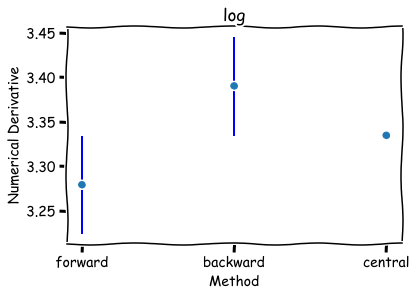

In [4]:
def plot_error_bars(function):
    methods = "forward", "backward", "central"
    dv_list = []
    re_list = []
    te_list = []
    for method in methods:
        dv, re, te = numerical_derivative(function, 0.3, 0.01, method)
        dv_list.append(dv)
        re_list.append(re)
        te_list.append(te)
    x_values = [1,2,3]
    plt.errorbar(x_values, dv_list, xerr = [0,0,0], yerr = te_list, ecolor = "#0000FF", linewidth = 0, elinewidth = 2, marker = "o")
    plt.xlabel("Method")
    plt.ylabel("Numerical Derivative")
    plt.xticks(x_values, methods)
    plt.title(function.__name__)
    plt.show() 

for function in functions_list:
    plot_error_bars(function)


### Using one method (any), compare the values by varying the step size (h) (5 values of your choice) (Take a = 0.3). Again, use plotting as a tool for comparison (similar to part i), this time plotting h on the x-axis.

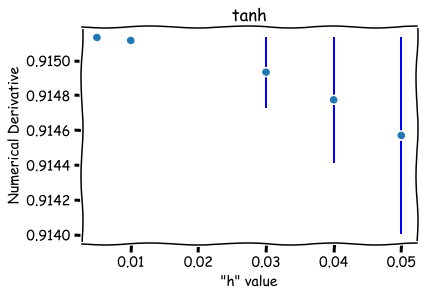

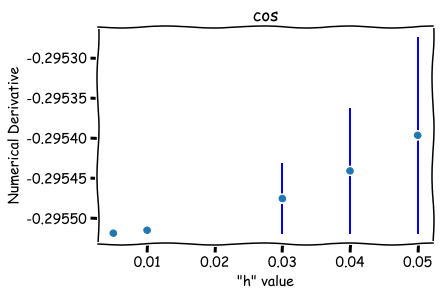

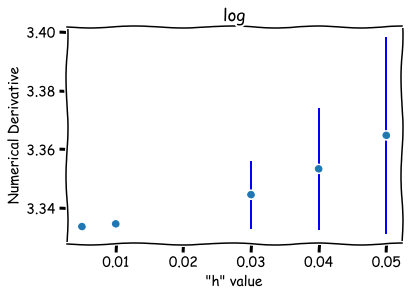

In [6]:
#Using the "central" method
h_values = [0.005, 0.01, 0.03, 0.04, 0.05]

def plot_h(function):
    dv_list = []
    re_list = []
    te_list = []
    for h in h_values:
        dv, re, te = numerical_derivative(function, 0.3, h, "central")
        dv_list.append(dv)
        re_list.append(re)
        te_list.append(te)
    plt.errorbar(h_values, dv_list, xerr = np.zeros(5), yerr = te_list, ecolor = "#0000FF", linewidth = 0, elinewidth = 2, marker = "o")
    plt.xlabel("\"h\" value")
    plt.ylabel("Numerical Derivative")
    plt.title(function.__name__)
    plt.show()
for function in functions_list:
    plot_h(function)

### iii. Using the same method used above, compare the values by varying a (5 values of your choice), while keeping the step size to be constant (h = 0.03). Again, use plotting as a tool for comparison (similar to part i), this time plotting a on the x-axis, and any constant value on y-axis (when you plot it you’ll realize why we are choosing a constant value and not the derivative value itself, as we did in parts i and ii).

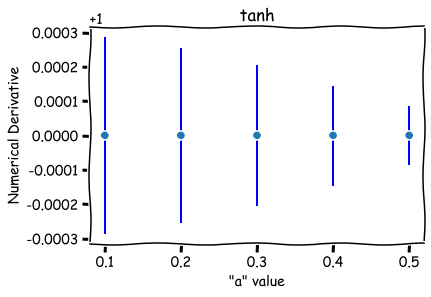

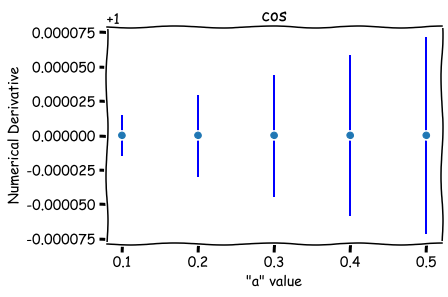

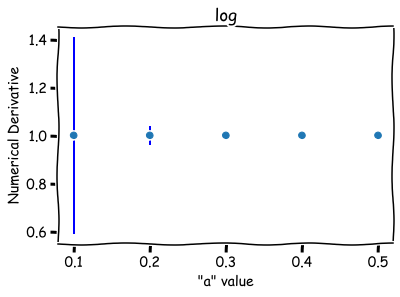

In [7]:
a_values = np.arange(0.1, 0.6, 0.1)

def plot_a(function):
    dv_list = []
    re_list = []
    te_list = []
    for a in a_values:
        dv, re, te = numerical_derivative(function, a, 0.03, "central")
        dv_list.append(dv)
        re_list.append(re)
        te_list.append(te)
    plt.errorbar(a_values, np.ones(5), xerr = np.zeros(5), yerr = te_list, ecolor = "#0000FF", linewidth = 0, elinewidth = 2, marker = "o")
    plt.xlabel("\"a\" value")
    plt.ylabel("Numerical Derivative")
    plt.title(function.__name__)
    plt.show()
for function in functions_list:
    plot_a(function)

### (b) Print the rounding errors in each case (i, ii, iii) in part (a).

In [20]:
def print_rounding_errors_i(function):
    methods = "forward", "backward", "central"
    re_list = []
    for method in methods:
        _, re, _ = numerical_derivative(function, 0.3, 0.01, method)
        re_list.append(re)
    print(function.__name__, ": ", re_list)

h_values = [0.005, 0.01, 0.03, 0.04, 0.05]
def print_rounding_errors_ii(function):
    re_list = []
    for h in h_values:
        dv, re, te = numerical_derivative(function, 0.3, h, "central")
        re_list.append(re)
    print(function.__name__, ": ", re_list)
    
a_values = np.arange(0.1, 0.6, 0.1)
def print_rounding_errors_iii(function):
    re_list = []
    for a in a_values:
        dv, re, te = numerical_derivative(function, a, 0.03, "central")
        re_list.append(re)
    print(function.__name__, ": ", re_list)    

print("i")
for function in functions_list:
    print_rounding_errors_i(function)
print("ii")
for function in functions_list:
    print_rounding_errors_ii(function)
print("iii")
for function in functions_list:
    print_rounding_errors_iii(function)


i
tanh :  [5.826252249031818e-09, 5.826252249031818e-09, 5.826252249031818e-09]
cos :  [1.9106729782512118e-08, 1.9106729782512118e-08, 1.9106729782512118e-08]
log :  [2.4079456086518724e-08, 2.4079456086518724e-08, 2.4079456086518724e-08]
ii
tanh :  [1.1652504498063636e-08, 5.826252249031818e-09, 1.942084083010606e-09, 1.4565630622579545e-09, 1.1652504498063635e-09]
cos :  [3.8213459565024237e-08, 1.9106729782512118e-08, 6.36890992750404e-09, 4.7766824456280296e-09, 3.821345956502424e-09]
log :  [4.815891217303745e-08, 2.4079456086518724e-08, 8.026485362172908e-09, 6.019864021629681e-09, 4.815891217303744e-09]
iii
tanh :  [6.644532974997055e-10, 1.3158354681660268e-09, 1.9420840830106065e-09, 2.5329930817014994e-09, 3.080781048400065e-09]
cos :  [6.633361101853506e-09, 6.5337771856082775e-09, 6.36890992750404e-09, 6.140406626685901e-09, 5.850550412602486e-09]
log :  [1.535056728662697e-08, 1.0729586082894002e-08, 8.026485362172906e-09, 6.108604879161033e-09, 4.620981203732969e-09]


### (c) Plot the function, exact derivatives and numerical derivatives of the above mentioned functions in the range (1, 10) (step size = 0.1). For numerical derivatives, use h = 0.01 and any method of your choice.

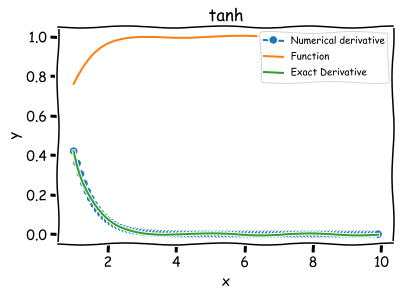

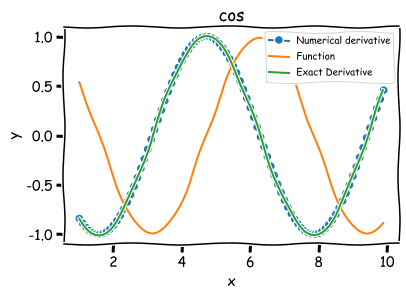

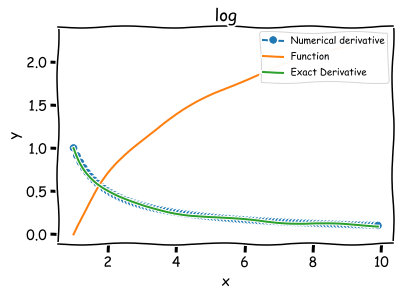

In [25]:
def plot_derivatives_function(function, function_derivative):
    dv_list = []
    x_values = np.arange(1, 10, 0.1)
    for a in x_values:
        dv, re, te = numerical_derivative(function, a, 0.01, "central")
        dv_list.append(dv)
    plt.plot(x_values, dv_list, marker = 'o')
    plt.plot(x_values, function(x_values))
    plt.plot(x_values, function_derivative(x_values))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(function.__name__)
    plt.legend(["Numerical derivative", "Function", "Exact Derivative"], fontsize= "x-small", loc = "upper right")
    plt.show()
    
for function, function_derivative in (np.tanh,lambda x: 1/(np.cosh(x)*np.cosh(x))), (np.cos, lambda x: -np.sin(x)), (np.log, lambda x: 1/x):
    plot_derivatives_function(function, function_derivative)

## 2. Consider the function 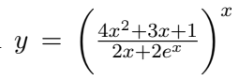 Plot the scipy derivative (take dx = 0.01) and numerical derivative (take h = 0.01, central method) along with the function itself, in the range (0,6) with a step size of 0.1. Label them with proper legends.

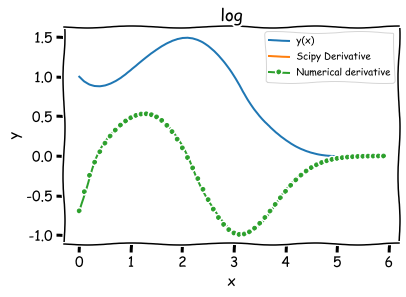

In [52]:
def y(x):
    return ((4* (x**2) + 3 * x + 1)/(2 * x + 2 * np.exp(x)))**x
y = np.vectorize(y)

def scipy_derivative(x):
    return derivative(y, x0 = x, dx=0.01, n=1, order = 3)
scipy_derivative = np.vectorize(scipy_derivative)

def numerical_derivative_central(x):
    dv, re, te = numerical_derivative(y, x, 0.01, "central")
    return dv
numerical_derivative_central = np.vectorize(numerical_derivative_central)

x_values = np.arange(0, 6, 0.1)
plt.plot(x_values,  y(x_values))
plt.plot(x_values, scipy_derivative(x_values))
plt.plot(x_values, numerical_derivative_central(x_values), marker = ".")
plt.xlabel("x")
plt.ylabel("y")
plt.title(function.__name__)
plt.legend(["y(x)", "Scipy Derivative", "Numerical derivative"], fontsize = "x-small")
plt.show()

## 3. For the function 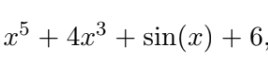 at value x = 0.3, plot in the same plot: exact derivative (as a horizontal line), numerical derivative using central method, and derivative using Richardson extrapolation with k = 1 and k = 2. On y − axis are the derivative values, and x − axis should have h values which vary between (0.05, 0.2) in the step size of 0.01. Label the curves using plot legends, and label the axes.

In [78]:
#using x = 0.3
def richardson_extrapolation(function, h, k):
    nd = lambda h: numerical_derivative(function, 0.3, h, "central")[0]
    return (2*(2**k)*nd(h) - nd(2*h))/(2*(2**k) - 1)

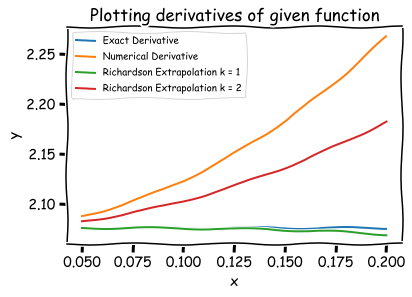

In [82]:
def function(x):
    return x**5 + 4 * x**3 + np.sin(x) + 6

h_values = np.arange(0.05, 0.2, 0.01)

#Exact derivative
def exact_derivative(x):
    return 5 * (x**4) + 12 * (x**2) + np.cos(x)
exact_derivative_value = exact_derivative(0.3)
plt.plot(h_values, exact_derivative_value*np.ones(len(h_values)))

#Numerical Derivative
nd = np.vectorize(lambda h: numerical_derivative(function, 0.3, h, "central")[0])
plt.plot(h_values, nd(h_values))

#Richardson Extrapolation
plt.plot(h_values, richardson_extrapolation(function, h_values, 1))
plt.plot(h_values, richardson_extrapolation(function, h_values, 2))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotting derivatives of given function")
plt.legend(["Exact Derivative", "Numerical Derivative",
            "Richardson Extrapolation k = 1",  "Richardson Extrapolation k = 2"],
           fontsize = "x-small")

plt.show()

## 4. The energy radiated in the form of gravitational waves can be computed from the GW polarisation amplitudes (h+, h×) using the following formula:
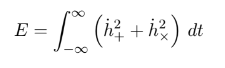
## where, the overdot on h+ and h× indicates a time derivative.

### (a) Import and extract the data from the file nr-data.txt, that lists (t, h+, h×) as column vectors. Hint: Use ‘loadtxt’ function of Numpy library.

In [103]:
data  = np.loadtxt(r"C:\Users\haric\OneDrive\Desktop\Files\Education\obsidian notes\Notes\IITM-Academics\PH1050 Mathematica and Python\nr_data.txt")
#print(data)
print(np.shape(data))
t_values, h_plus_values, h_times_values = data.T

(47562, 3)


### (b) Plot (h+, h×) in a single plot as a function of time, t.

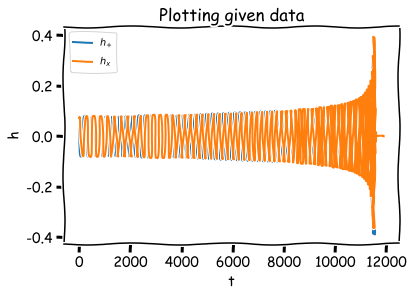

In [102]:
plt.plot(t_values, h_plus_values)
plt.plot(t_values, h_times_values)
plt.xlabel("t")
plt.ylabel("h")
plt.title("Plotting given data")
plt.legend(["$h_{+}$", "$h_{x}$"],
           fontsize = "x-small")

plt.show()

### (c) Compute the time derivatives ($\dot h_+$, $\dot h_x$) using central difference method. Use time step size (dt = 0.25).

In [109]:
h_plus_values_derivative = np.array([h_plus_values[i + 1] - h_plus_values[i - 1] for i in range(1, len(h_plus_values) - 1)])/(2 * 0.25)
h_plus_values_derivative = np.array([h_times_values[i + 1] - h_times_values[i - 1] for i in range(1, len(h_times_values) - 1)])/(2 * 0.25)